In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
import pingouin as pg
import reliability_stability
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\raft_data_7-nodes.csv", error_bad_lines=False, sep=",")
paxos = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\paxos_data_7-nodes.csv", error_bad_lines=False, sep=",")
noAlg = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\control\\outdoor_control_7-nodes\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 3858: expected 8 fields, saw 9\nSkipping line 4595: expected 8 fields, saw 9\nSkipping line 4975: expected 8 fields, saw 9\n'
b'Skipping line 1144: expected 8 fields, saw 9\nSkipping line 2090: expected 8 fields, saw 9\nSkipping line 2746: expected 8 fields, saw 9\n'
b'Skipping line 49: expected 8 fields, saw 9\nSkipping line 325: expected 8 fields, saw 9\nSkipping line 636: expected 8 fields, saw 9\nSkipping line 665: expected 8 fields, saw 9\nSkipping line 764: expected 8 fields, saw 9\n'


In [4]:
raft.shape

(6306, 8)

In [5]:
paxos.shape

(5673, 8)

In [6]:
noAlg.shape

(2627, 8)

In [7]:
raft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      6306 non-null   object 
 1   packetNumber  6306 non-null   object 
 2   temperature   6306 non-null   object 
 3   brightness    6245 non-null   object 
 4   humidity      6245 non-null   object 
 5   onBoardTemp   6244 non-null   object 
 6   sent          6242 non-null   object 
 7   received      6234 non-null   float64
dtypes: float64(1), object(7)
memory usage: 394.2+ KB


In [8]:
paxos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5673 entries, 0 to 5672
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      5673 non-null   object 
 1   packetNumber  5673 non-null   object 
 2   temperature   5668 non-null   object 
 3   brightness    5584 non-null   object 
 4   humidity      5582 non-null   object 
 5   onBoardTemp   5581 non-null   object 
 6   sent          5576 non-null   float64
 7   received      5568 non-null   float64
dtypes: float64(2), object(6)
memory usage: 354.7+ KB


In [9]:
noAlg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2627 non-null   object 
 1   packetNumber  2627 non-null   object 
 2   temperature   2586 non-null   object 
 3   brightness    2550 non-null   object 
 4   humidity      2503 non-null   object 
 5   onBoardTemp   2459 non-null   object 
 6   sent          2395 non-null   object 
 7   received      2317 non-null   float64
dtypes: float64(1), object(7)
memory usage: 164.3+ KB


In [10]:
raft[raft.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,4,1,21,312,37,24,706362029810,7.063620e+11
1,5,1,21,88,42,23,706362030731,7.063620e+11
2,6,1,19,515,41,23,706362032600,7.063620e+11
3,7,1,20,189,41,22,706362034044,7.063620e+11
4,1,4,19,202,41,23,706362036215,7.063620e+11
...,...,...,...,...,...,...,...,...
6301,3,999,21,225,47,24,706372527472,7.063725e+11
6302,4,997,21,616,37,26,706372528859,7.063725e+11
6303,4,998,20,618,37,26,706372530366,7.063725e+11
6304,4,999,22,485,37,26,706372531874,7.063725e+11


In [11]:
paxos[paxos.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,5,1,19,52,53,18,7.063445e+11,7.063445e+11
1,6,1,18,178,54,17,7.063445e+11,7.063445e+11
2,7,1,19,85,49,18,7.063445e+11,7.063445e+11
3,1,5,19,172,53,18,7.063445e+11,7.063445e+11
4,2,3,19,121,50,18,7.063445e+11,7.063445e+11
...,...,...,...,...,...,...,...,...
5668,5,994,20,331,36,23,7.063550e+11,7.063550e+11
5669,6,997,19,1150,34,23,7.063550e+11,7.063550e+11
5670,7,1000,21,430,34,23,7.063550e+11,7.063550e+11
5671,1,999,20,622,35,23,7.063550e+11,7.063550e+11


In [12]:
noAlg[noAlg.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,3,2,21,336,44,23,706631632373,7.066316e+11
1,2,2,22,662,39,22,706631633056,7.066316e+11
2,3,3,22,337,44,23,706631633879,7.066316e+11
3,2,3,23,647,39,22,706631634864,7.066316e+11
4,3,4,22,134,44,23,NaN,7.066316e+11
...,...,...,...,...,...,...,...,...
2622,5,996,24,678,35,26,706633648095,7.066336e+11
2623,5,997,24,678,35,26,706633650103,7.066337e+11
2624,5,998,23,682,35,26,706633652112,7.066337e+11
2625,5,999,24,687,35,26,706633654119,7.066337e+11


In [13]:
raft_dropna=raft.dropna()

In [14]:
raft_dropna.shape

(6234, 8)

In [15]:
paxos_dropna=paxos.dropna()

In [16]:
paxos_dropna.shape

(5568, 8)

In [17]:
noAlg_dropna=noAlg.dropna()

In [18]:
noAlg_dropna.shape

(2317, 8)

In [19]:
raft_timings = raft_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [20]:
paxos_timings = paxos_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [21]:
noAlg_timings = noAlg_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [22]:
raft_timings_coerce = raft_timings.apply(pd.to_numeric, errors = 'coerce')

In [23]:
paxos_timings_coerce= paxos_timings.apply(pd.to_numeric, errors = 'coerce')

In [24]:
noAlg_timings_coerce= noAlg_timings.apply(pd.to_numeric, errors = 'coerce')

In [25]:
raft_timings_coerce_dropna=raft_timings_coerce.dropna()

In [26]:
paxos_timings_coerce_dropna=paxos_timings_coerce.dropna()

In [27]:
noAlg_timings_coerce_dropna=noAlg_timings_coerce.dropna()

In [28]:
raft_timings_coerce_dropna.shape

(6206, 2)

In [29]:
paxos_timings_coerce_dropna.shape

(5568, 2)

In [30]:
noAlg_timings_coerce_dropna.shape

(2174, 2)

In [31]:
raft_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 0 to 6305
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      6206 non-null   float64
 1   received  6206 non-null   float64
dtypes: float64(2)
memory usage: 145.5 KB


In [32]:
paxos_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 5672
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      5568 non-null   float64
 1   received  5568 non-null   float64
dtypes: float64(2)
memory usage: 130.5 KB


In [33]:
noAlg_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2626
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2174 non-null   float64
 1   received  2174 non-null   float64
dtypes: float64(2)
memory usage: 51.0 KB


In [34]:
raft_timings_redone = {'sent': [],'received':[]}

raft_result_redone = pd.DataFrame(raft_timings_redone)

In [35]:
paxos_timings_redone = {'sent': [],'received':[]}

paxos_result_redone = pd.DataFrame(paxos_timings_redone)

In [36]:
noAlg_timings_redone = {'sent': [],'received':[]}

noAlg_result_redone = pd.DataFrame(noAlg_timings_redone)

In [37]:
for index, row in raft_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > raft_timings_coerce_dropna['sent'].iloc[0]):
            
            raft_result_redone.at[index, 'sent'] = int(row['sent'])
            raft_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [38]:
for index, row in paxos_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > paxos_timings_coerce_dropna['sent'].iloc[0]):
            
            paxos_result_redone.at[index, 'sent'] = int(row['sent'])
            paxos_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [39]:
for index, row in noAlg_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > noAlg_timings_coerce_dropna['sent'].iloc[0]):
            
            noAlg_result_redone.at[index, 'sent'] = int(row['sent'])
            noAlg_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [40]:
raft_result_redone.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 1 to 6305
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      5983 non-null   float64
 1   received  5983 non-null   float64
dtypes: float64(2)
memory usage: 300.2 KB


In [41]:
paxos_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 1 to 5672
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      4978 non-null   float64
 1   received  4978 non-null   float64
dtypes: float64(2)
memory usage: 276.7 KB


In [42]:
noAlg_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 1 to 2626
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2098 non-null   float64
 1   received  2098 non-null   float64
dtypes: float64(2)
memory usage: 129.2 KB


In [43]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=raft_result_redone)

(0.9999999975562757, array([1., 1.]))

In [44]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=paxos_result_redone)

(0.9999999989602635, array([1., 1.]))

In [45]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=noAlg_result_redone)

(0.9999999695547097, array([1., 1.]))

In [46]:
raft_latency_pd = {'latency': []}

raft_latency = pd.DataFrame(raft_latency_pd)

In [47]:
paxos_latency_pd = {'latency': []}

paxos_latency = pd.DataFrame(paxos_latency_pd)

In [48]:
noAlg_latency_pd = {'latency': []}

noAlg_latency = pd.DataFrame(noAlg_latency_pd)

In [49]:
for index, row in raft_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        raft_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [50]:
for index, row in paxos_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        paxos_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [51]:
for index, row in noAlg_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        noAlg_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [52]:
raft_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 1 to 6305
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  5983 non-null   float64
dtypes: float64(1)
memory usage: 253.5 KB


In [53]:
raft_latency.shape

(5983, 1)

In [54]:
paxos_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 1 to 5672
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  4978 non-null   float64
dtypes: float64(1)
memory usage: 237.8 KB


In [55]:
paxos_latency.shape

(4978, 1)

In [56]:
noAlg_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 1 to 2626
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  2098 non-null   float64
dtypes: float64(1)
memory usage: 112.8 KB


In [57]:
noAlg_latency.shape

(2098, 1)

In [58]:
raft_latency['latency'].mean()

436.0934313889353

In [59]:
paxos_latency['latency'].mean()

509.56769787063075

In [60]:
noAlg_latency['latency'].mean()

378.3465204957102

In [61]:
pwd

'C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook'

In [62]:
latency_7 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_7.csv", error_bad_lines=False, sep=",")

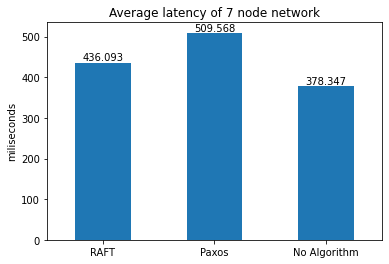

In [69]:
ax = latency_7.plot.bar(x='algorithm')
plt.title('Average latency of 7 node network')
ax.set(xlabel='', ylabel='miliseconds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
#ax.plot(legend=False)
ax.get_legend().remove()
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\latency_7_mean.png', bbox_inches='tight')